<a href="https://colab.research.google.com/github/sahil0220/Clothes-Pridiction-Using-CNN/blob/master/Clothes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("Number of samples in training dataset: "+ str(len(x_train)))
print("Number of labels in training dataset: "+ str(len(y_train)))
print("Dimensions of a single image in x_train: "+ str(len(x_train[0].shape)))
print("--------------------------------------------------------------")
print("Number of samples in test dataset: "+ str(len(x_test)))
print("Number of labels in test dataset: "+ str(len(y_test)))
print("Dimensions of a single image in x_test: "+ str(len(x_test[0].shape)))

Number of samples in training dataset: 60000
Number of labels in training dataset: 60000
Dimensions of a single image in x_train: 2
--------------------------------------------------------------
Number of samples in test dataset: 10000
Number of labels in test dataset: 10000
Dimensions of a single image in x_test: 2


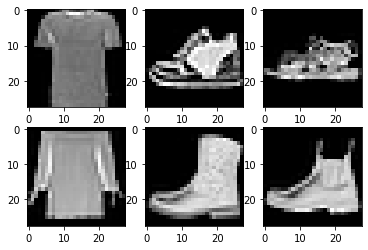

In [5]:
import matplotlib.pyplot as plt

plt.subplot(231)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(232)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(233)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(234)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(235)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

plt.subplot(236)
random_num= np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap("gray"))

In [6]:
import keras
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K

batch_size=128
epochs= 100

img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]

x_train=x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test=x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape=(img_rows, img_cols, 1)

x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255 
x_test/=255

y_train= np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [7]:
model_fitting=model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(x_test,y_test))

score=model.evaluate(x_test, y_test, verbose=0)
print("The test loss = ", score[0])
print("The test accuracy = ", score[1])

Epoch 1/100
469/469 [==============================] - 5s 10ms/step - loss: 2.4533 - accuracy: 0.2859 - val_loss: 1.5801 - val_accuracy: 0.5347
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 1.5486 - accuracy: 0.5172 - val_loss: 0.9119 - val_accuracy: 0.6972
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 1.2494 - accuracy: 0.6066 - val_loss: 0.7908 - val_accuracy: 0.7326
Epoch 4/100
469/469 [==============================] - 4s 9ms/step - loss: 1.0981 - accuracy: 0.6519 - val_loss: 0.7181 - val_accuracy: 0.7533
Epoch 5/100
469/469 [==============================] - 4s 9ms/step - loss: 0.9994 - accuracy: 0.6794 - val_loss: 0.6694 - val_accuracy: 0.7669
Epoch 6/100
469/469 [==============================] - 4s 9ms/step - loss: 0.9302 - accuracy: 0.6989 - val_loss: 0.6347 - val_accuracy: 0.7776
Epoch 7/100
469/469 [==============================] - 4s 9ms/step - loss: 0.8863 - accuracy: 0.7141 - val_loss: 0.6037 - val_accuracy: 0.788

In [10]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.22-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.22-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [11]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [12]:
import os

In [13]:
os.chdir('/content/drive/My Drive/projects')

In [14]:
model.save('clothing_classification_model.h5')

In [15]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


def load_image(filename):
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	img = img_to_array(img)
	img = img.reshape(1, 28, 28, 1)
	img = img.astype('float32')
	img = img / 255.0
	return img


img = load_image('shoe.jpg')

model = load_model('clothing_classification_model.h5')

class_prediction = model.predict_classes(img)
print(class_prediction[0])


if class_prediction[0] == 0:
  product = "T-shirt/top"
elif class_prediction[0] == 1:
  product = "Trouser"
elif class_prediction[0] == 2:
  product = "Pullover"
elif class_prediction[0] == 3:
  product = "Dress"
elif class_prediction[0] == 4:
  product = "Coat"
elif class_prediction[0] == 5:
  product = "Sandal"
elif class_prediction[0] == 6:
  product = "Shirt"
elif class_prediction[0] == 7:
  product = "Sneaker"
elif class_prediction[0] == 8:
  product = "Bag"
else:
  product = "Ankle boot"

print(product)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
9
Ankle boot
